In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
def generateDataset(N, f, sigma):
    vf = np.vectorize(f) 
    mu = 0.0
    x= np.linspace(0,1,N)
    normal=np.random.default_rng().normal(mu, sigma, N)
    t = vf(x) + normal
    return x,t

In [3]:
def f(x): return math.sin(2 * math.pi * x)

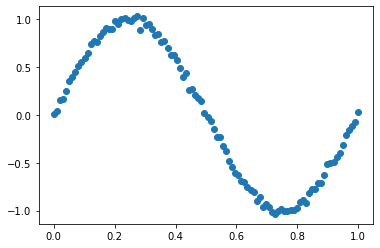

In [4]:
x,t=generateDataset(100, f, 0.03)
plt.scatter(x,t)

In [5]:
def E(w):
    return 0.5*np.dot(y(x)-t,y(x)-t)

In [6]:
def y(x,w,M):
    phi= np.array([[a**i for i in range (M+1)]for a in x])
    return np.dot(phi,w)

In [7]:
def optimizeLS(x, t, M):
    phi= np.array([[a**i for i in range (M+1)]for a in x])
    prod = np.dot(phi.T, phi)                  
    i = np.linalg.inv(prod)                   
    m = np.dot(i, phi.T)                      
    wLS = np.dot(m, t)  
    return wLS



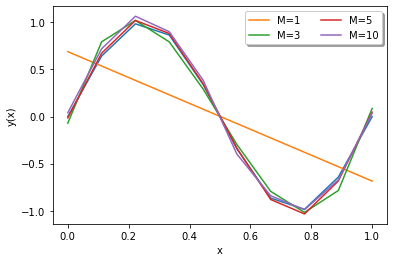

In [8]:
vf = np.vectorize(f) 
x,t = generateDataset(10, f, 0.03)
plt.plot(x, vf(x))
for M in [1,3,5,10]:
    wLS = optimizeLS(x,t,M)
    plt.plot(x, y(x,wLS,M), label=f"M={M}")
    plt.xlabel('x')
    plt.ylabel('y(x)')
leg = plt.legend(loc='best', ncol=2, shadow=True, fancybox=True)
plt.show()

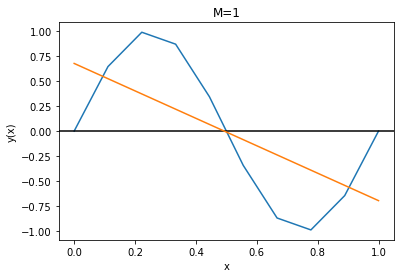

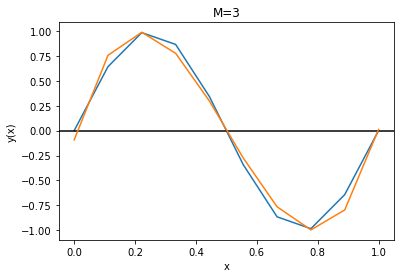

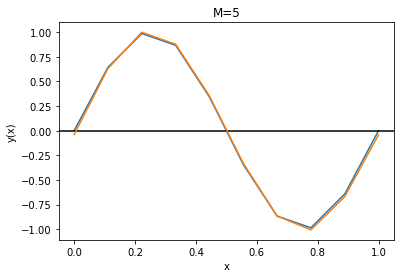

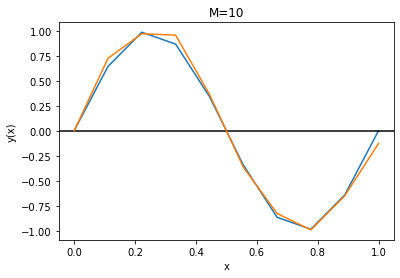

In [9]:

vf = np.vectorize(f) 
x,t = generateDataset(10, f, 0.03)
i=1
for M in [1,3,5,10]:
    wLS = optimizeLS(x,t,M)
    plt.figure(i)
    plt.title(f'M={M}')
    plt.plot(x,vf(x))
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.axhline(y=0, color='k')
    plt.plot(x, y(x,wLS,M),label="m=%m" )
    i=i+1

plt.show()


In [10]:
def optimizePLS(x, t, M, lamda):
    phi= np.array([[a**i for i in range (M+1)]for a in x])
    prod = np.dot(phi.T, phi)+ lamda*np.eye(M+1)                  
    i = np.linalg.inv(prod) 
    m = np.dot(i, phi.T)                      
    wPLS = np.dot(m, t)  
    return wPLS

In [11]:
def generateDataset3(N, f, sigma):
    vf = np.vectorize(f) 
    mu = 0.0
    x= np.linspace(0,1,3*N)
    np.random.shuffle(x)
    normal=np.random.default_rng().normal(mu, sigma, 3*N)
    t = vf(x) + normal
    return x[:N],t[:N],x[N:2*N],t[N:2*N],x[2*N:],t[2*N:]

In [12]:
x1,t1,x2,t2,x3,t3= generateDataset3(10, f, 0.03)
print(x1,'\n','\n',t1,'\n','\n',x2,'\n','\n',t2,'\n','\n',x3,'\n','\n',t3,'\n')

[0.44827586 0.37931034 1.         0.86206897 0.96551724 0.55172414
 0.10344828 0.75862069 0.4137931  0.79310345] 
 
 [ 0.31516245  0.69484364 -0.01439839 -0.76908709 -0.14512088 -0.33405113
  0.60649997 -0.97331751  0.46960025 -0.97888638] 
 
 [0.27586207 0.24137931 0.         0.62068966 0.13793103 0.51724138
 0.06896552 0.68965517 0.89655172 0.20689655] 
 
 [ 0.93006016  0.98276939  0.03343065 -0.68976596  0.70966135 -0.07500846
  0.42001453 -0.93688442 -0.60628613  0.94288454] 
 
 [0.72413793 0.34482759 0.5862069  0.82758621 0.93103448 0.17241379
 0.48275862 0.31034483 0.65517241 0.03448276] 
 
 [-1.00926187  0.83034279 -0.5146236  -0.88779835 -0.44647751  0.90010745
  0.11087387  0.96367431 -0.78984057  0.2338953 ] 



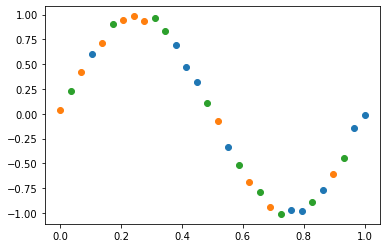

In [13]:
plt.scatter(x1,t1)
plt.scatter(x2,t2)
plt.scatter(x3,t3)

In [14]:
def NEw(x, t, w, N,M):
    err=t-y(x,w,M)
    return (1/N)*(math.sqrt(np.dot(err,err)))

Given the synthetic dataset, optimize for the value of λ by varying the value of log(λ) from -40 to -20
on the development set. Draw the plot of the normalized error of the model for the training, development
and test for the case of N = 10 and the case of N=100. The normalized error of the model is defined as:

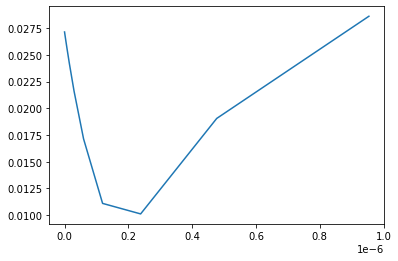

In [63]:
N=10
M=5
xt, tt, xv, tv, xts, tts =generateDataset3(N, f, 0.03)
NE=[]
for i in range (-40,-19):
    lamda= 2**i
    wPLS= optimizePLS(xt, tt, M, lamda)
    NE.append(NEw(xv,tv,wPLS,N,M))
r=[pow(2,i) for i in range(-40,-19)]
plt.plot(r,NE)

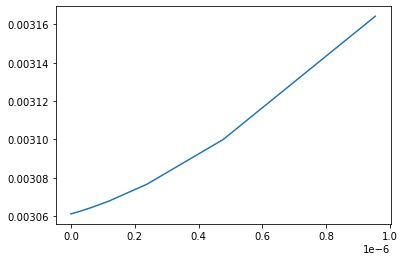

In [62]:
N=100
xt, tt, xv, tv, xts, tts =generateDataset3(N, f, 0.03)
NE=[]
for i in range (-40,-19):
    lamda= 2**i
    wPLS= optimizePLS(xt, tt, M, lamda)
    NE.append(NEw(xv,tv,wPLS,N,M))
r=[2**i for i in range(-40,-19)]
plt.plot(r,NE)

In [64]:
xt, tt, xv, tv, xts, tts =generateDataset3(N, f, 0.03)

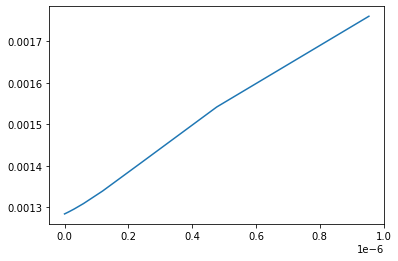

In [70]:
N=100
NE=[]
for i in range (-40,-19):
    lamda= 2**i
    wPLS= optimizePLS(xt, tt, M, lamda)
    NE.append(NEw(xv,tv,wPLS,N,M))
plt.plot([2**i for i in range(-40,-19)],NE)


In [71]:
def optimizePLS2(xt, tt, xv, tv, M):
    NE=[]
    for i in range (-40,-19):
        lamda= 2**i
        wPLS= optimizePLS(xt, tt, M, lamda)
        NE.append(NEw(xv,tv,wPLS,N,M))
    best= np.argmin(NE)-41.
    plt.plot([2**i for i in range(-40,-19)],NE)
    return pow(2,best)

4.547473508864641e-13

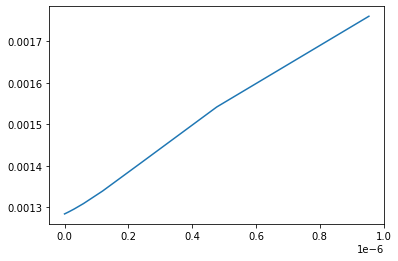

In [72]:
optimizePLS2(xt, tt, xv, tv, M)



something look weird in this plots that change all the time...


In [18]:
def bayesianEstimator(x, t, M, alpha, sigma2):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-18-dbac96dc2520>, line 2)